In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import scipy.optimize
import scipy.stats
from scipy.integrate import quad
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
import copy
import calendar
from optimise_GDD_fctns import * #Phenology_set, run_GDD_and_get_RMSE, run_GDD_and_get_RMSE_derivs, plot_profiles_at_minimum, get_station_locations, put_ERA5_in_array
vec_expint = np.vectorize(expint)
#import seaborn as sns

import plotting
import dataset_fctns
import modelling_fctns
import seaborn as sns
#from dwd_phenpy import Phenology_set

#import openeo
#import ee
## Trigger the authentication flow.
#ee.Authenticate()#(auth_mode='localhost')
# Initialize the library.
#ee.Initialize(project='ee-martinparker637')

c:\Users\wlwc1989\Documents\Phenology_Test_Notebooks\phenology_dwd\optimisation_experiments\optimise_GDD_fctns.py:34: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  station_data = pd.read_csv("https://opendata.dwd.de/climate_environment/CDC/help/PH_Beschreibung_Phaenologie_Stationen_Jahresmelder.txt",sep = ";\s+|;\t+|;\s+\t+|;\t+\s+|;|\s+;|\t+;|\s+\t+;|\t+\s+;", encoding='cp1252', on_bad_lines='skip')


27.8
28.0


Text(0.5, 1.0, 'Normal temperature response versus temperature response modified for larger scale')

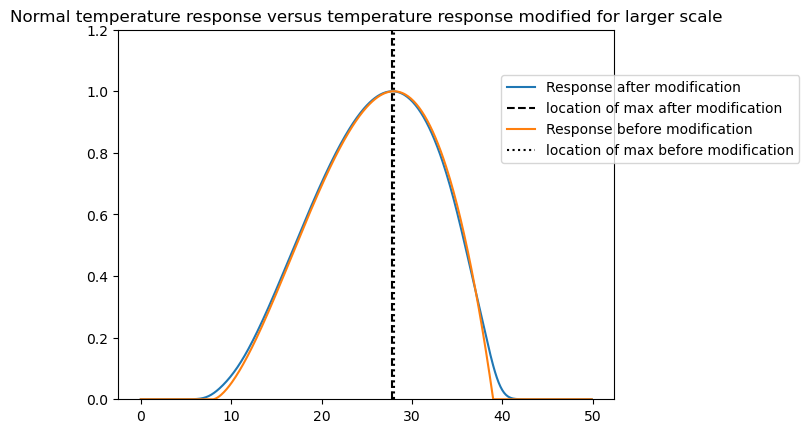

In [2]:
#%matplotlib inline
fig, ax = plt.subplots()
meantemp = np.arange(0, 50, 0.1)
plotvals = vec_expint(8, 28, 39, meantemp, 1, 3)
maxloc = plotvals.argmax()
maxval = meantemp[maxloc]
print(maxval)
ax.plot(meantemp, plotvals/(plotvals.max()), label = 'Response after modification')
ax.axvline(maxval, color = 'black', label = 'location of max after modification', linestyle = '--')
unconvolved = modelling_fctns.Wang_Engel_Temp_response(meantemp, 8, 28, 39)
maxloc = unconvolved.argmax()
maxval = meantemp[maxloc]
print(maxval)
ax.plot(meantemp, unconvolved/unconvolved.max(), label = 'Response before modification')
ax.axvline(maxval, color = 'black', label = 'location of max before modification', linestyle = ':')
meantemp = np.arange(0, 49, 0.1)
fig.legend(bbox_to_anchor = (1.2, 0.8))
ax.set_ylim((0, 1.2))
ax.set_title('Normal temperature response versus temperature response modified for larger scale')
#ax.plot(meantemp, table[(np.round(meantemp/5, decimals = 1)*10).astype(int)])#Convolved_Wang_Engel(np.arange(0, 50, 0.5), 8, 28, 39, gap = 5))